# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).


Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia: del nombrevariable

# Desarrollo

## Red pre-entrenada - VGG16

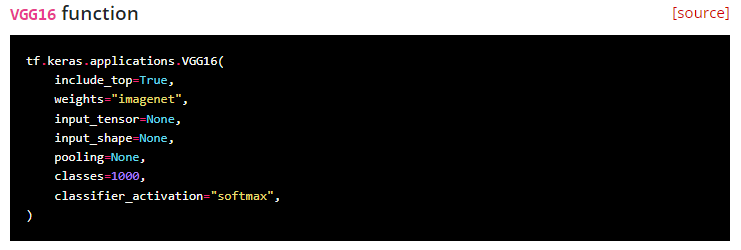

####Carga librerías y Dataset

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import vgg16
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR100
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(trainX.max())
print(trainY.min())

# Pasamos las etiquetas a One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# PREPROCESADO DE DATOS
# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
trainX = vgg16.preprocess_input(trainX)
testX = vgg16.preprocess_input(testX)

print(trainX.max())
print(trainY.min())

[INFO]: Loading CIFAR-100 data...
255
0
151.061
0


####Carga topologia de CNN (base model)

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el Top Model (parte destinada a la clasificación)
                 input_shape=(32,32,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

#### Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)

In [ ]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 14,871,716
Trainable params: 157,028
Non-trainable params: 14,714,688
_________________________________________________________________


#### Entrenando la solución

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
313/313 [==============================] - 6s 9ms/step - loss: 6.7825 - accuracy: 0.1327 - val_loss: 3.8990 - val_accuracy: 0.1833
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 3.3608 - accuracy: 0.2507 - val_loss: 3.4012 - val_accuracy: 0.2492
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 2.7952 - accuracy: 0.3329 - val_loss: 3.1522 - val_accuracy: 0.2837
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 2.4232 - accuracy: 0.3980 - val_loss: 3.0283 - val_accuracy: 0.3058
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 2.1535 - accuracy: 0.4467 - val_loss: 2.9585 - val_accuracy: 0.3211
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.9422 - accuracy: 0.4889 - val_loss: 2.9315 - val_accuracy: 0.3327
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7681 - accuracy: 0.5308 - val_loss: 2.9355 - val_accuracy: 0.3417
Epoch 

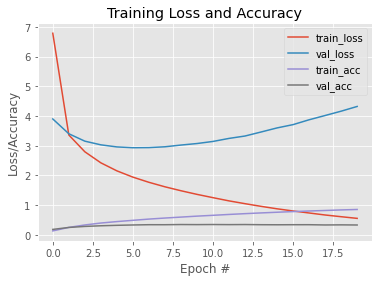

In [ ]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)

# Para conectar el notebook con la cuenta de gdrive
drive.mount('/content/drive/')
BASE_FOLDER = '/content/drive/My Drive/Nuclio/Clases/' # Ajustar el directorio raíz de Google Drive

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive') 

# Almacenamos el modelo empleando la función mdoel.save de Keras
pre_trained_model.save(BASE_FOLDER+"deepCNN_CIFAR100_pretrained.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(testX, batch_size=128)

# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

* Después de 20 epochs los valores de accuracy y pérdida no son muy buenos: loss:0.5712 - accuracy: 0.8509 - val_loss: 4.3194 - val_accuracy: 0.3341.
* La gráfica es la esperada, aunque no sus valores, si tenemos en cuenta el proceso con CIFAR10

#### Creando el top model y descongelando bloques convolucionales (FINE TUNING)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


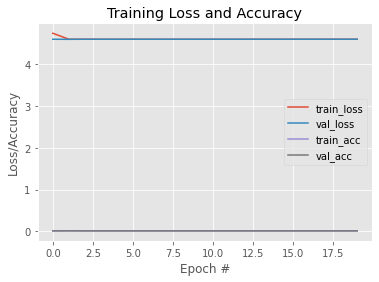

In [ ]:
# Imports que vamos a necesitar
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import vgg16, VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Cargamos el dataset CIFAR100
(trainX, trainY), (testX, testY) = cifar100.load_data() 

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet
trainX = vgg16.preprocess_input(trainX) 
testX = vgg16.preprocess_input(testX) 

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 3) 
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


# En caso de inestabilidades numéricas pasar datos a one-hot encoding
trainY = to_categorical(trainY) 
testY = to_categorical(testY) 

# Importamos VGG16 con pesos de imagenet y sin Top Model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'block5_conv1': 
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 

# Cogemos la última capa del model y le añadimos nuestro clasificador (Top Model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x) 
x = Dense(256, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 

model = Model(base_model.input, x) 

# Compilamos el modelo
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
model.summary() 

# Entrenamos el modelo
H = model.fit(trainX, trainY, validation_split=0.2, batch_size=256, epochs=20, verbose=1) 

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX, batch_size=64)

# Obtener el report de clasificación
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

El accuracy es peor al aplicar el Fine Tuning

## Red pre-entrenada - EfficientNetB0

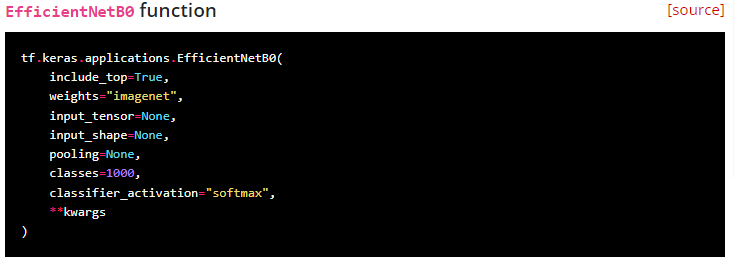

#### Carga de liberías

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.backend as K
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

import albumentations as albu

#### Redimensionar imágenes

In [ ]:
def resize_img(img, shape):
    #Usaremos la interpolación INTER_CUBIC para agrandar la imagen de 32x32 a 224x224 necesaria para utilizar EfficientNetB0
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

#### Clase para generar Data

In [ ]:
class DataGenerator(keras.utils.Sequence):
    #generador de data para keras
    def __init__(self, images, labels=None, mode='fit', batch_size=8, dim=(224, 224), channels=3, n_classes=100, shuffle=True, augment=False):
        
        #Inicialización de la configuración del generador
        self.images = images
        self.labels = labels
        self.mode = mode
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
   
    #Función que se llama después de cada epoch
    def on_epoch_end(self):
        self.indexes = np.arange(self.images.shape[0])
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    #Función del número de pasos en un epoch usando samples y batch size
    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))
    
    #Función para obtener un batch de datos
    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index+1) * self.batch_size]      
        X = np.empty((self.batch_size, *self.dim, self.channels))
        for i, ID in enumerate(batch_indexes):
            img = self.images[ID]
            img = img.astype(np.float32)/255.
            img = resize_img(img, self.dim)
            X[i] = img
            
        if self.mode == 'fit':
            y = self.labels[batch_indexes]
            
            if self.augment == True:
                X = self.__augment_batch(X)
            return X, y
        
        elif self.mode == 'predict':
            return X
        
        else:
            raise AttributeError("Solo 'fit' o 'predict'")
            
    #Función aumento de la imagen
    def __random_transform(self, img):
        composition = albu.Compose([albu.HorizontalFlip(p=0.5),
                                   albu.VerticalFlip(p=0.5),
                                   albu.GridDistortion(p=0.2),
                                   albu.ElasticTransform(p=0.2)])
        return composition(image=img)['image']
    
    #Función aumento de un conjunto de imágenes
    def __augment_batch(self, img_batch):
        for i in range(img_batch.shape[0]):
            img_batch[i] = self.__random_transform(img_batch[i])
        return img_batch

#### Carga del Dataset

In [ ]:
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR100
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()
# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


print(trainX.max())
print(trainY.min())

# Pasamos las etiquetas a One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainX.max())
print(trainY.min())

[INFO]: Loading CIFAR-100 data...
255
0
255
0


In [ ]:
train_generator = DataGenerator(trainX, trainY, augment = True)
valid_generator = DataGenerator(testX, testY, augment = False)

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Carga topología

In [ ]:
import efficientnet.keras as efn 

efnb0 = efn.EfficientNetB0(weights = 'imagenet', include_top = False, classes = 100, input_shape = (224,224,3))

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               128100    
                                                                 
Total params: 4,177,664
Trainable params: 4,135,648
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
efnb0.trainable = False

In [ ]:
sgd = SGD(lr = 1e-3, momentum = 0.9, nesterov = True)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, restore_best_weights = True, verbose = 1)
rlrop = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = 5, 
                        factor = 0.5, min_lr = 1e-6, verbose = 1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### Compilando el modelo

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['acc'])

#### Entrenando el modelo

In [ ]:
hist = model.fit(train_generator,validation_data = valid_generator, 
                           epochs = 20, verbose = 1, callbacks = [es, rlrop])


# Para conectar el notebook con la cuenta de gdrive
drive.mount('/content/drive/')
BASE_FOLDER = '/content/drive/My Drive/Nuclio/Clases/' # Ajustar el directorio raíz de Google Drive

# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save_weights(BASE_FOLDER+"deepCNN_CIFAR100_pretrained.h5")


Epoch 1/20
6250/6250 [==============================] - 698s 111ms/step - loss: 3.3434 - acc: 0.2380 - val_loss: 2.4195 - val_acc: 0.4178 - lr: 0.0010
Epoch 2/20
6250/6250 [==============================] - 682s 109ms/step - loss: 2.7003 - acc: 0.3410 - val_loss: 2.1284 - val_acc: 0.4670 - lr: 0.0010
Epoch 3/20
6250/6250 [==============================] - 676s 108ms/step - loss: 2.5145 - acc: 0.3765 - val_loss: 1.9935 - val_acc: 0.4859 - lr: 0.0010
Epoch 4/20
6250/6250 [==============================] - 682s 109ms/step - loss: 2.4225 - acc: 0.3918 - val_loss: 1.9206 - val_acc: 0.5015 - lr: 0.0010
Epoch 5/20
6250/6250 [==============================] - 685s 110ms/step - loss: 2.3512 - acc: 0.4080 - val_loss: 1.8587 - val_acc: 0.5141 - lr: 0.0010
Epoch 6/20
6250/6250 [==============================] - 686s 110ms/step - loss: 2.3032 - acc: 0.4167 - val_loss: 1.8184 - val_acc: 0.5242 - lr: 0.0010
Epoch 7/20
6250/6250 [==============================] - 680s 109ms/step - loss: 2.2589 - acc: 

1250/1250 [==============================] - 2s 2ms/step
[[0.00039788 0.00526048 0.00193065 ... 0.00234348 0.00263435 0.00946772]
 [0.00299852 0.00483943 0.01267735 ... 0.0146301  0.00959176 0.0155178 ]
 [0.00250154 0.0036757  0.0028311  ... 0.00301079 0.00562144 0.00231675]
 ...
 [0.00798473 0.00872738 0.00831232 ... 0.00692612 0.01123612 0.00949728]
 [0.00492135 0.00636826 0.01565286 ... 0.01283808 0.0126175  0.01155297]
 [0.06497654 0.0407945  0.01323931 ... 0.00123856 0.02137681 0.00160902]]


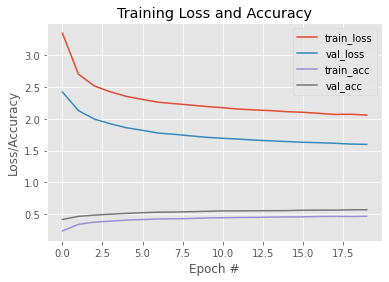

In [ ]:
predictions = model.predict(testX, batch_size=8)
print (predictions)

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Red desde 0

In [ ]:
# Librerías
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...


In [ ]:
# PREPROCESAMIENTO DE LOS DATOS
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainX.shape)
print(trainY.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(testX.shape)
print(testY.shape)

(10000, 32, 32, 3)
(10000, 1)


####Inspeccionando datos

In [ ]:
print(trainX[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.76470588 0.80392157 0.75686275]
  [0.83137255 0.87843137 0.8       ]
  [0.71372549 0.76078431 0.65490196]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.66666667 0.69019608 0.58823529]
  [0.63137255 0.65882353 0.50980392]
  [0.57254902 0.60392157 0.44313725]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.74117647 0.78039216 0.6627451 ]
  [0.65098039 0.69803922 0.50980392]
  [0.4745098  0.52156863 0.34117647]]

 ...

 [[0.58039216 0.7254902  0.30980392]
  [0.55686275 0.71372549 0.22352941]
  [0.54901961 0.70196078 0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490196 0.24313725 0.05882353]
  [0.29803922 0.30196078 0.07843137]]

 [[0.47843137 0.61568627 0.25882353]
  [0.47058824 0.60784314 0.22745098]


#### Las 100 imágenes

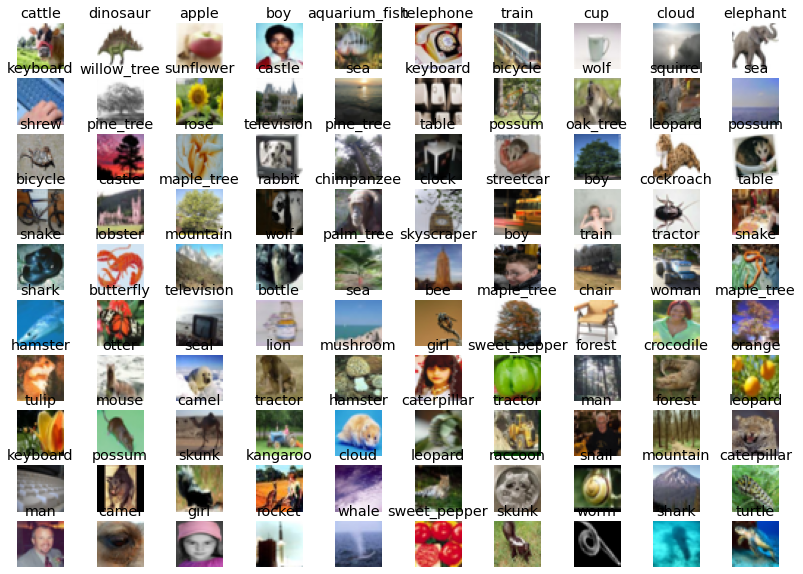

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(100):
    fig.add_subplot(10, 10, 1+n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

#### Topología de red neuronal y entrenamiento: MLP

[INFO]: Entrenando red neuronal...
Epoch 1/50
313/313 [==============================] - 3s 5ms/step - loss: 4.6631 - accuracy: 0.0107 - val_loss: 4.6031 - val_accuracy: 0.0168
Epoch 2/50
313/313 [==============================] - 1s 4ms/step - loss: 4.6163 - accuracy: 0.0108 - val_loss: 4.6024 - val_accuracy: 0.0209
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 4.6082 - accuracy: 0.0112 - val_loss: 4.6005 - val_accuracy: 0.0210
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 4.6027 - accuracy: 0.0126 - val_loss: 4.5969 - val_accuracy: 0.0249
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 4.5998 - accuracy: 0.0138 - val_loss: 4.5939 - val_accuracy: 0.0321
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 4.5951 - accuracy: 0.0152 - val_loss: 4.5854 - val_accuracy: 0.0274
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 4.5873 - accuracy: 0.0151 - val_loss: 4

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


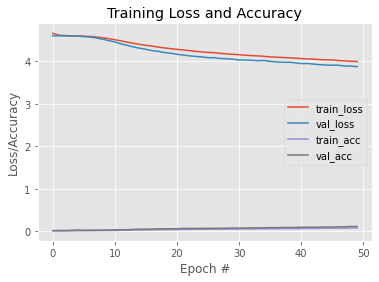

In [ ]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential()
model.add(Flatten())
# Primera capa oculta
model.add(Dense(2048, input_shape=(3072,), activation="relu")) # input_shape = 32 x 32 x 3
model.add(Dropout(0.5))
# Segunda capa oculta
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
# Tercera capa oculta
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
# Cuarta capa oculta
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
# Capa de salida
model.add(Dense(100, activation="softmax"))


# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal

# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=128)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")

# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32)

# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### Topología de red neuronal y entrenamiento: CNN

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
313/313 [==============================] - 5s 11ms/step - loss: 4.0339 - accuracy: 0.1296 - val_loss: 6.5302 - val_accuracy: 0.0245
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 3.1180 - accuracy: 0.2521 - val_loss: 2.8044 - val_accuracy: 0.3084
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 2.6042 - accuracy: 0.3428 - val_loss: 2.4853 - val_accuracy: 0.3780
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 2.2845 - accuracy: 0.3994 - val_loss: 2.3387 - val_accuracy: 0.3970
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 2.0691 - accuracy: 0.4505 - val_loss: 2.0680 - val_accuracy: 0.4571
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8947 - accuracy: 0.4889 - val_loss: 2.0531 - val_accuracy: 0.4645
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7280 - accuracy: 0.5261 - val_loss: 1.8811 - val_accuracy: 0.5035
Epoch

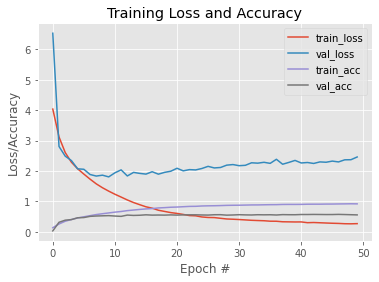

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

#########################################
###### Definimos la arquitectura ########
#########################################
# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# BASE MODEL
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR100.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Conclusiones

Se han utilizado dos aplicaciones de keras para utilizar redes preentrenadas
Utilizando la aplicación de keras vgg16 se obtienen un accuracy con valores que nos lleven a pensar que es el modelo correcto.
Como segunda opción de redes preentrenadas se ha utilizado la aplicación de EfficientNetB0 con la complejidad de que se necesitan transformar las imágenes a 224x224 y por lo tanto su entrenamiento es bastante lento, pero su accuracy, al tener imágenes más finas es bastante aceptable.


por otra lado, se ha trabajado con arquitecturas desde 0. Inicialmente usando redes neuronales sin CNN, cuyo accuracy deja mucho que desear.
Una vez incluída la convolución, el modelo ha mejorado bastante con un accuracy aceptable.

El mayor problema que hemos tenido es la falta de tiempo para hacer más y más pruebas, con lo cual seguramente se hubieran obtenidos mejores modelos. Igualmente, falta de tiempo para poder probar las diferentes aplicaciones de keras de modelos preentrenados, ya que al parecer cada una tiene sus particularidades y exigía más esfuerzo para implementar cada uno de ellos.
Y también, falta de tiempo para los entrenamientos, ya que al ser imágenes, y según la transformación llevada a cabo, y así se trabaje con Colab Premium, los tiempos son bastante largos. Ahora mismo, esperando que termine el último entrenamiento antes de subir el entregable.

Con más tiempo, y  menos carga de trabajo de las otras asignaturas seguramente nos hubieramos divertido más haciendo esta entrega, cuyo tema es bastante interesante y muy práctico.